# ECE 285 Assignment 1: Logistic Regression

For this part of assignment, you are tasked to implement a logistic regression algorithm for multiclass classification and test it on the CIFAR10 dataset.

You sould run the whole notebook and answer the questions in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.


In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from ece285.utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


# Logistic Regression for multi-class classification


A Logistic Regression Algorithm has 3 hyperparameters that you can experiment with:

- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, and later you are asked to experiment with different values. We recommend looking at the graphs and observing how the performance of the classifier changes with different learning rate.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the linear classifier update rule for each sample in the training set. We evaluate our models after every 10 epochs and save the accuracies, which are later used to plot the training, validation and test VS epoch curves.
- **Weight Decay** - Regularization can be used to constrain the weights of the classifier and prevent their values from blowing up. Regularization helps in combatting overfitting. You will be using the 'weight_decay' term to introduce regularization in the classifier.

The only way how a Logistic Regression based classification algorithm is different from a Linear Regression algorithm is that in the former we additionally pass the classifier outputs into a sigmoid function which squashes the output in the (0,1) range. Essentially these values then represent the probabilities of that sample belonging to class particular classes


### Implementation (40%)

You need to implement the Linear Regression method in `algorithms/logistic_regression.py`. You need to fill in the sigmoid function, training function as well as the prediction function.


In [6]:
# Import the algorithm implementation (TODO: Complete the Logistic Regression in algorithms/logistic_regression.py)
from ece285.algorithms import Logistic
from ece285.utils.evaluation import get_classification_accuracy

num_classes = 10  # Cifar10 dataset has 10 different classes

# Initialize hyper-parameters
learning_rate = 0.01  # You will be later asked to experiment with different learning rates and report results
num_epochs_total = 1000  # Total number of epochs to train the classifier
epochs_per_evaluation = 10  # Epochs per step of evaluation; We will evaluate our model regularly during training
N, D = dataset[
    "x_train"
].shape  # Get training data shape, N: Number of examples, D:Dimensionality of the data
weight_decay = 0.00002

x_train = dataset["x_train"].copy()
y_train = dataset["y_train"].copy()
x_val = dataset["x_val"].copy()
y_val = dataset["y_val"].copy()
x_test = dataset["x_test"].copy()
y_test = dataset["y_test"].copy()

# Insert additional scalar term 1 in the samples to account for the bias as discussed in class
x_train = np.insert(x_train, D, values=1, axis=1)
x_val = np.insert(x_val, D, values=1, axis=1)
x_test = np.insert(x_test, D, values=1, axis=1)

In [7]:
# Training and evaluation function -> Outputs accuracy data
def train(learning_rate_, weight_decay_):
    # Create a linear regression object
    logistic_regression = Logistic(
        num_classes, learning_rate_, epochs_per_evaluation, weight_decay_
    )

    # Randomly initialize the weights and biases
    weights = np.random.randn(num_classes, D + 1) * 0.0001

    train_accuracies, val_accuracies, test_accuracies = [], [], []

    # Train the classifier
    for _ in tqdm(range(int(num_epochs_total / epochs_per_evaluation))):
        # Train the classifier on the training data
        weights = logistic_regression.train(x_train, y_train, weights)

        # Evaluate the trained classifier on the training dataset
        y_pred_train = logistic_regression.predict(x_train)
        train_accuracies.append(get_classification_accuracy(y_pred_train, y_train))

        # Evaluate the trained classifier on the validation dataset
        y_pred_val = logistic_regression.predict(x_val)
        val_accuracies.append(get_classification_accuracy(y_pred_val, y_val))

        # Evaluate the trained classifier on the test dataset
        y_pred_test = logistic_regression.predict(x_test)
        test_accuracies.append(get_classification_accuracy(y_pred_test, y_test))

    return train_accuracies, val_accuracies, test_accuracies, weights


In [8]:
import matplotlib.pyplot as plt


def plot_accuracies(train_acc, val_acc, test_acc):
    # Plot Accuracies vs Epochs graph for all the three
    epochs = np.arange(0, int(num_epochs_total / epochs_per_evaluation))
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch/10")
    plt.plot(epochs, train_acc, epochs, val_acc, epochs, test_acc)
    plt.legend(["Training", "Validation", "Testing"])
    plt.show()


In [9]:
# Run training and plotting for default parameter values as mentioned above
t_ac, v_ac, te_ac, weights = train(learning_rate, weight_decay)


  0%|          | 0/100 [00:00<?, ?it/s]

[[-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.69219093]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.69352959]
 ...
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]]
[[-0.69389242 -0.69266955 -0.6942902  ... -0.69276813 -0.69407327
  -0.69477418]
 [-0.69421077 -0.69167416 -0.69470324 ... -0.69204896 -0.69410861
  -0.        ]
 [-0.69553423 -0.69133463 -0.69434775 ... -0.69091036 -0.69283616
  -0.        ]
 ...
 [-0.69462329 -0.69306912 -0.69441111 ... -0.6912932  -0.69228909
  -0.69314361]
 [-0.69469081 -0.69129799 -0.69493938 ... -0.6921632  -0.69304124
  -0.69430279]
 [-0.6929628  -0.69384    -0.69399976 ... -0.69277176 -0.69397224
  -0.69372426]]
Epoch 0, Loss [[0.00013878 0.00013853 0.00013886 ... 0.00013855 

  1%|          | 1/100 [00:04<07:31,  4.57s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ nan  nan  nan ...  nan 

  2%|▏         | 2/100 [00:11<09:24,  5.76s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [  0.  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [  0.  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]
 ...
 [-inf   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0

  3%|▎         | 3/100 [00:14<07:31,  4.65s/it]

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
          -inf]
 [         nan          nan          nan ...          nan          nan
  -20.55862108]
 ...
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. -0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Epoch 0, Loss [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        inf]
 [       nan        nan        nan ...        nan        nan 0.00411172]
 ...
 [       nan        nan        nan ...    

  4%|▍         | 4/100 [00:20<08:01,  5.02s/it]

[[nan  0. nan ... nan nan -0.]
 [nan  0. nan ... nan nan  0.]
 [nan  0. nan ... nan nan  0.]
 ...
 [nan  0. nan ... nan nan  0.]
 [nan  0. nan ... nan nan  0.]
 [nan -0. nan ... nan nan nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.  nan]
 [  0. -inf   0. ...   0.   0.  nan]
 ...
 [  0. -inf   0. ...   0.   0. -inf]
 [  0. -inf   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan  0.]
 [nan inf nan ... nan nan nan]
 [nan inf nan ... nan nan nan]
 ...
 [nan inf nan ... nan nan inf]
 [nan inf nan ... nan nan inf]
 [nan  0. nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [  0.  nan  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0. -inf]
 ...
 [ -0.  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]]
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [        -inf   0.           0.         ...   0.                 -

  5%|▌         | 5/100 [00:25<07:55,  5.01s/it]

[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  nan  -0. -inf]
 [ nan  nan  nan ...  -0.  -0.   0.]
 ...
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.           0.           0.         ... -15.87420522   0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
           nan]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...         -inf   0.
    0.        ]
 [  0.           0.           0.         ...         -inf   0.
    0.        ]]
Epoch 0, Loss [[       nan        nan        nan ... 0.00317484        nan        nan]
 [       nan        nan        nan ...        nan 0.                inf]
 [       nan        nan        nan ... 0.         0.                nan]
 ...
 [       nan        nan        nan ... 0.             

  6%|▌         | 6/100 [00:32<09:07,  5.82s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan   0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan inf nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. nan]
 ...
 [ 0.  0.  0

  7%|▋         | 7/100 [00:40<09:53,  6.38s/it]

[[          nan   -0.                   nan ...           nan
            nan           nan]
 [          nan   -0.                   nan ...           nan
            nan -626.11954337]
 [          nan           nan           nan ...           nan
            nan    0.        ]
 ...
 [          nan           nan           nan ...           nan
            nan    0.        ]
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[       nan 0.                nan ...        nan        nan        nan]
 [       nan 0.                nan ...        nan        nan 0.12522391]
 [       nan        nan        nan ...        na

  8%|▊         | 8/100 [00:46<09:49,  6.41s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [  0.  nan  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan   0.  nan]
 [ -0.  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [inf nan nan ... nan inf inf]
 [inf nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan inf nan]
 [ 0. nan nan ... nan nan nan]
 [ 0. nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

  9%|▉         | 9/100 [00:51<09:05,  6.00s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan  0.]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan -456.52585857]
 [          nan           nan           nan ...           nan
            nan    0.        ]
 ...
 [          nan           nan           nan ...           nan
            nan    0.       

 10%|█         | 10/100 [00:55<07:50,  5.23s/it]

[[ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  -0. ...  nan   0.  -0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  -0.  nan  nan]]
[[  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan inf ... nan nan nan]
 [nan nan inf ... nan inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan nan  0. ... nan inf  0.]
 [nan nan inf ... nan nan nan]
 [nan nan inf ...  0. nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.  nan -inf]
 [ nan  nan  nan ...  -0.  nan   0.]
 ...
 [ nan  nan  nan ...  -0.  nan   0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 11%|█         | 11/100 [00:58<06:48,  4.59s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.   0. -inf]
 [ nan  nan  nan ...   0.   0. -inf]
 ...
 [ nan  nan  nan ...   0.   0.  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf -inf   0.]
 [  0.   0.   0. ... -inf -inf   0.]
 ...
 [  0.   0.   0. ... -inf -inf   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan nan nan ... inf inf inf]
 [nan nan nan ... inf inf inf]
 ...
 [nan nan nan ... inf inf nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[          nan    0.                   nan ...           nan
            nan           nan]
 [          nan    0.                   nan ...           nan
            nan          -inf]
 [          nan   -0.                   nan ...           nan
            nan -395.08544154]
 ...
 [          nan    0.                   nan ...       

 12%|█▏        | 12/100 [01:04<07:36,  5.19s/it]

[[ nan  -0.   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan   0. -inf]
 [  0.  nan  -0. ...  nan   0. -inf]
 ...
 [ nan  nan  -0. ...  nan  -0.  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.           0.                 -inf ...   0.           0.
    0.        ]
 [  0.         -33.27106467         -inf ...   0.                 -inf
    0.        ]
 [        -inf   0.           0.         ...   0.                 -inf
    0.        ]
 ...
 [  0.           0.           0.         ...   0.         -11.17995927
    0.        ]
 [  0.           0.                 -inf ...   0.           0.
    0.        ]
 [  0.           0.                 -inf ...   0.           0.
    0.        ]]
Epoch 0, Loss [[       nan 0.                inf ...        nan        nan        nan]
 [       nan 0.00665421        inf ...        nan        inf        inf]
 [       inf        nan 0.         ...        nan        inf        inf]
 ...
 [       nan        nan 0.    

 13%|█▎        | 13/100 [01:08<06:49,  4.71s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  -0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [inf nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan  0. nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 14%|█▍        | 14/100 [01:12<06:34,  4.58s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  -0.  nan   0.]
 ...
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ...  0. nan nan]
 ...
 [nan nan nan ...  0. nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[          nan           nan           nan ...           nan
            nan   -0.        ]
 [          nan   -0.                   nan ...           nan
     0.         -219.14315183]
 [          nan           nan           nan ...           nan
     0.            0.        ]
 ...
 [          nan           nan           nan ...       

 15%|█▌        | 15/100 [01:16<06:09,  4.35s/it]

[[ nan  -0.  -0. ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [ nan  nan  -0. ...  nan  nan -inf]
 ...
 [ nan  nan  -0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan  0.  0. ... nan nan nan]
 [nan inf inf ... nan nan inf]
 [nan nan  0. ... nan nan inf]
 ...
 [nan nan  0. ... nan nan nan]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  -0.  nan ...  nan   0.   0.]
 ...
 [ nan   0.  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]

 16%|█▌        | 16/100 [01:20<05:56,  4.24s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  -0.   0. -inf]
 ...
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan nan nan ...  0. inf inf]
 [nan nan nan ...  0. inf inf]
 ...
 [nan nan nan ...  0. nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  -0.  nan ...  nan  nan -inf]
 ...
 [ nan   0.  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]

 17%|█▋        | 17/100 [01:24<05:41,  4.11s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan  0. inf]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  -0. ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [ nan  -0.  -0. ...  nan  nan -inf]
 ...
 [ nan   0.  -0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]]
[[ 0.00000000e+00            -inf  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.

 18%|█▊        | 18/100 [01:27<05:21,  3.93s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  -0.  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.         -26.64841146   0.         ...   0.           0.
    0.        ]
 [  0.                 -inf   0.         ...   0.           0.
    0.        ]
 [  0.           0.     

 19%|█▉        | 19/100 [01:30<04:53,  3.62s/it]

[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan          -inf]
 [          nan           nan           nan ...           nan
            nan -219.69163537]
 ...
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        inf]
 [       nan        nan        nan ...        nan        nan 0.04393833]
 ...
 [       nan        nan        nan ...    

 20%|██        | 20/100 [01:34<04:46,  3.58s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan  0. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]

 21%|██        | 21/100 [01:37<04:46,  3.62s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ nan  nan  nan ...  nan 

 22%|██▏       | 22/100 [01:41<04:41,  3.61s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  -0.   0. ...  nan  nan  nan]
 [ nan  -0.  -0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0. -inf   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0

 23%|██▎       | 23/100 [01:44<04:35,  3.58s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan   0.  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan na

 24%|██▍       | 24/100 [01:48<04:39,  3.68s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[          nan           nan           nan ...           nan
            nan   -0.        ]
 [          nan           nan           nan ...           nan
     0.         -250.57930669]
 [          nan           nan           nan ...           nan
     0.            0.        ]
 ...
 [          nan           nan           nan ...           nan
            nan    0.        ]
 [          nan           nan    

 25%|██▌       | 25/100 [01:52<04:45,  3.80s/it]

[[          nan    0.                   nan ...           nan
            nan   -0.        ]
 [          nan    0.                   nan ...           nan
     0.         -369.38912102]
 [          nan   -0.                   nan ...           nan
     0.            0.        ]
 ...
 [          nan   -0.                   nan ...           nan
    -0.            0.        ]
 [          nan           nan           nan ...           nan
            nan   -0.        ]
 [          nan   -0.                   nan ...           nan
            nan   -0.        ]]
[[  0.                 -inf   0.         ...   0.           0.
    0.        ]
 [  0.                 -inf   0.         ...   0.                 -inf
    0.        ]
 [  0.           0.           0.         ...   0.                 -inf
           nan]
 ...
 [  0.         -19.23423808   0.         ...   0.           0.
          -inf]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0. 

 26%|██▌       | 26/100 [01:55<04:23,  3.56s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  -0.   0.  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ... -inf   0

 27%|██▋       | 27/100 [01:59<04:16,  3.51s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ...  0. nan nan]]
[[ nan   0.  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  -0.  nan ...  nan  nan   0.]
 [ nan  nan   0. ...   0.  nan  nan]
 [ -0.  -0.  nan ...   0.  nan  nan]]
[[  0.                 -inf   0.         ... -20.72653136   0.
    0.        ]
 [  0.                 -inf   0

 28%|██▊       | 28/100 [02:03<04:19,  3.60s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  -0.  nan ...  nan  -0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf nan ... nan inf inf]
 [nan nan nan ... nan inf inf]
 ...
 [nan  0. nan ... nan  0. nan]
 [nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. nan]
 ...
 [ 0.  0.  0

 29%|██▉       | 29/100 [02:08<04:49,  4.08s/it]

[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan  0. nan ... nan nan nan]
 [nan  0. nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ -0.  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0

 30%|███       | 30/100 [02:12<04:44,  4.06s/it]

[[ nan  nan  nan ...   0.  nan  -0.]
 [ nan  nan  nan ...  -0.  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  nan  -0. ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan  0.]
 [nan nan nan ...  0. nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan inf ... inf nan nan]
 [nan nan  0. ... inf nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

 31%|███       | 31/100 [02:15<04:20,  3.77s/it]

[[ nan  nan  -0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan -inf]
 [ nan  nan  -0. ...  nan  nan   0.]
 ...
 [ nan  nan  -0. ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan  0. ... nan nan nan]
 [nan nan inf ... nan nan inf]
 [nan nan  0. ... nan nan nan]
 ...
 [nan nan  0. ... nan nan inf]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan   -0.                   nan ...           nan
            nan          -inf]
 [   0.                   nan           nan ...           nan
            nan -453.06433203]
 ...
 [          nan           nan           nan ...       

 32%|███▏      | 32/100 [02:18<04:10,  3.69s/it]

[[         nan    0.                 nan ...          nan          nan
    -0.       ]
 [         nan    0.                 nan ...          nan          nan
  -196.6026882]
 [         nan          nan          nan ...          nan          nan
     0.       ]
 ...
 [         nan   -0.                 nan ...          nan          nan
     0.       ]
 [         nan          nan          nan ...          nan          nan
    -0.       ]
 [         nan   -0.                 nan ...          nan          nan
    -0.       ]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[       nan        inf        nan ...        nan        nan 0.        ]
 [       nan        inf        nan ...        nan        nan 0.03932054]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [    

 33%|███▎      | 33/100 [02:23<04:29,  4.02s/it]

[[ nan   0.  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  -0.  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  -0.  nan ...  -0.  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ...  0. nan nan]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan  0. nan ... nan nan inf]
 [nan nan nan ...  0. nan nan]
 [nan  0. nan ...  0. nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 34%|███▍      | 34/100 [02:28<04:44,  4.31s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[         nan          nan          nan ...    0.                 nan
           nan]
 [         nan          nan          nan ...          nan    0.
          -inf]
 [         nan          nan          nan ...          nan    0.
  -524.2191756]
 ...
 [         nan          nan          nan ...          nan    0.
           nan]
 [         nan          nan          nan ...    0.                 nan
       

 35%|███▌      | 35/100 [02:32<04:34,  4.22s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]

 36%|███▌      | 36/100 [02:37<04:37,  4.33s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...  -0.  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  -0.  nan  -0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[ 0.          0.          0.         ...        -inf  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [       -inf  0.          0.         ...  0.          0.
          nan]
 ...
 [ 0.          0.          0.         ...  0.          0.
  -2.97331788]
 [ 0.          0.          0.         ...        -inf  0.
   0.        ]
 [ 0.          0.          0.         ...        -inf  0.
   0.        ]]
Epoch 0, Loss [[       nan        nan        nan ...        inf        nan        nan]
 [       nan 0.                nan ... 0.                nan        inf]
 [       inf        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.                nan 0.00059466]
 [       nan     

 37%|███▋      | 37/100 [02:40<04:19,  4.11s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan   0. -inf]
 [ nan  nan  -0. ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan   0.  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan inf ... nan inf inf]
 [nan nan  0. ... nan inf inf]
 ...
 [nan nan nan ... nan inf nan]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 38%|███▊      | 38/100 [02:43<03:49,  3.70s/it]

[[ nan  nan  -0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan   0. -inf]
 [ nan  nan  -0. ...  nan   0. -inf]
 ...
 [ nan  nan  -0. ...  nan   0.  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
[[          nan           nan           nan ...   -0.
            nan           nan]
 [          nan           nan           nan ...           nan
            nan          -inf]
 [  -0.                   nan           nan ...           nan
            nan -364.34353789]
 ...
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...   -0.
            nan           nan]
 [          nan           nan           nan ...   -0.
            nan           nan]]
[[ 0

 39%|███▉      | 39/100 [02:46<03:37,  3.57s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  -0.  -0.   0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf nan ...  0. inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan  0. nan ...  0.  0. inf]
 [nan nan nan ... inf nan nan]
 [nan  0. nan ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 40%|████      | 40/100 [02:50<03:27,  3.46s/it]

[[ nan   0.  -0. ...  nan  nan  nan]
 [ nan   0.   0. ...  nan   0. -inf]
 [ nan  -0.  -0. ...  nan   0. -inf]
 ...
 [ nan   0.  -0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf  0. ... nan nan nan]
 [nan inf inf ... nan inf inf]
 [nan  0.  0. ... nan inf inf]
 ...
 [nan inf  0. ... nan nan nan]
 [nan nan inf ... nan nan nan]
 [nan  0. inf ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 41%|████      | 41/100 [02:53<03:28,  3.53s/it]

[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan  0. nan ... nan nan nan]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  -0.  nan ...  -0.  nan  nan]
 [ nan   0.  -0. ...  nan   0. -inf]
 [ -0.  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  -0.  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  nan  -0. ...   0.  nan  nan]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.99752278e+01
   0.00000000e+00  0.00000000e+00]
 [ 0.

 42%|████▏     | 42/100 [02:57<03:24,  3.52s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.  nan -inf]
 [ nan  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  -0.  nan   0.]
 [ nan  -0.  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0. -inf   0. ...   0.   0. -inf]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf nan ...  0. nan inf]
 [nan  0. nan ... nan nan nan]
 ...
 [nan inf nan ...  0. nan inf]
 [nan  0. nan ... inf nan nan]
 [nan  0. nan ... inf nan nan]]
[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan   -0.         ...           nan
            nan          -inf]
 [          nan           nan           nan ...           nan
            nan -243.35972487]
 ...
 [          nan           nan           nan ...       

 43%|████▎     | 43/100 [03:00<03:10,  3.33s/it]

[[          nan   -0.                   nan ...   -0.
            nan   -0.        ]
 [          nan    0.                   nan ...           nan
     0.         -431.19529078]
 [          nan           nan           nan ...           nan
     0.            0.        ]
 ...
 [          nan           nan           nan ...           nan
    -0.            0.        ]
 [          nan           nan           nan ...    0.
            nan   -0.        ]
 [          nan           nan           nan ...    0.
            nan           nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[       nan 0.                nan ... 0.                nan 0.        ]
 [       nan        inf        nan ...        nan        inf 0.08623906]
 [       nan        nan        nan ...        nan        inf        nan]

 44%|████▍     | 44/100 [03:03<03:04,  3.29s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan   0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0.   0

 45%|████▌     | 45/100 [03:06<03:04,  3.36s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  -0. ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  -0.  nan  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  -0.   0. ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf  0. ...  0. inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan  0. nan ...  0. nan nan]
 [nan nan inf ... inf nan nan]
 [nan  0. inf ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 46%|████▌     | 46/100 [03:11<03:16,  3.64s/it]

[[ nan   0.  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  -0.  -0. ...   0.  nan  nan]]
[[ 0.                -inf  0.         ... -7.11986229  0.
   0.        ]
 [ 0.                -inf  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.                -inf ...        -inf  0.
   0.        ]
 [ 0.          0.          0.         ...        -inf  0.
   0.        ]]
Epoch 0, Loss [[       nan        inf        nan ... 0.00142397        nan        nan]
 [       nan        inf        nan ...        nan        nan        inf]
 [       nan        nan        nan ...        nan        nan        inf]
 ...
 [       nan 0.                nan ...        nan        nan        nan]
 [       nan     

 47%|████▋     | 47/100 [03:15<03:21,  3.81s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  -0.  nan ...  nan   0. -inf]
 ...
 [ nan   0.  nan ...  nan   0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf nan ... nan inf inf]
 [nan  0. nan ... nan inf inf]
 ...
 [nan inf nan ... nan inf nan]
 [nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]]
[[         nan          nan          nan ...  -0.                  nan
           nan]
 [         nan          nan          nan ...          nan          nan
          -inf]
 [         nan          nan          nan ...          nan          nan
  -65.67364721]
 ...
 [         nan          nan          nan ...          nan          nan
 

 48%|████▊     | 48/100 [03:18<03:13,  3.72s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan nan nan ...  0. nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ...  0. nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

 49%|████▉     | 49/100 [03:22<03:01,  3.56s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan  0. nan ... nan inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan  0.  0.]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  -0. ...  nan  nan -inf]
 [ nan  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  -0.   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 50%|█████     | 50/100 [03:25<02:56,  3.54s/it]

[[ nan   0.  nan ...   0.  nan  -0.]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  -0.  nan ...  nan  nan   0.]
 [ nan  nan  -0. ...   0.  nan  nan]
 [ nan  -0.  nan ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan  0.]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan  0. nan ... nan nan inf]
 [nan nan  0. ... inf nan nan]
 [nan  0. nan ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  -0. -inf]
 [ nan  nan  -0. ...  nan  -0. -inf]
 ...
 [ nan  nan  -0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.            

 51%|█████     | 51/100 [03:28<02:45,  3.38s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan inf nan ...  0. nan inf]
 [inf nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  -0.  nan ...  nan   0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]

 52%|█████▏    | 52/100 [03:31<02:37,  3.28s/it]

[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan  0. nan ... nan nan nan]
 [nan inf inf ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  -0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.00000000e+00 -1.43281498e-10  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.

 53%|█████▎    | 53/100 [03:36<03:01,  3.87s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [  0.  -0.  -0. ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ -0.  -0.   0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]
 ...
 [  0. -inf   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf inf ... nan nan inf]
 [inf  0.  0. ... nan nan nan]
 ...
 [nan inf nan ... nan nan inf]
 [nan nan inf ... nan nan nan]
 [ 0.  0. inf ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 54%|█████▍    | 54/100 [03:40<02:48,  3.67s/it]

[[ nan   0.  nan ...  -0.  nan  -0.]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  -0.  nan ...  -0.  nan  nan]]
[[ 0.00000000e+00            -inf  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00            -inf  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [           -inf  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00             nan]
 ...
 [ 0.00000000e+00            -inf  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00            -inf]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.53505062e+01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.14628237e-10
   0.00000000e+00  0.00000000e+00]]
Epoch 0, Loss [[           nan            inf            nan ... 0.00000000e+00
             nan 0.00000000e+00]
 [           nan       

 55%|█████▌    | 55/100 [03:43<02:38,  3.53s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan  nan]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
          nan]
 ...
 [ 0.          0.          0.         ...  0.          0.
         -inf]
 [ 0.          0.                -inf ...  0.          0.
   0.        ]
 [ 0.          0.         -0.00572745 ...  0.          0.
   0.        ]]
Epoch 0, Loss [[           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan 0.00000000e+00 ...            nan
             nan            inf]
 [           nan            nan            nan ...            nan
             nan            nan]
 ...
 [          

 56%|█████▌    | 56/100 [03:46<02:32,  3.46s/it]

[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan  0. nan ... nan nan nan]
 [nan inf nan ... nan nan inf]
 [inf nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  -0. ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [ nan  nan  -0. ...  nan  nan   0.]
 ...
 [ nan  -0.  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 57%|█████▋    | 57/100 [03:49<02:25,  3.39s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.   0. -inf]
 [ nan  -0.  nan ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  -0.  nan   0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...   0.  nan  nan]]
[[  0.                 -inf   0.         ...         -inf   0.
    0.        ]
 [  0.                 -inf   0.         ...   0.                 -inf
    0.        ]
 [  0.           0.           0.         ...   0.                 -inf
           nan]
 ...
 [  0.         -20.22365897   0.         ...   0.           0.
          -inf]
 [  0.         

 58%|█████▊    | 58/100 [03:53<02:24,  3.45s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...  -0.  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  nan  -0. ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan  0. nan ...  0. nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ...  0. nan nan]
 [nan nan inf ... inf nan nan]
 [nan nan  0. ... inf nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]

 59%|█████▉    | 59/100 [03:57<02:23,  3.49s/it]

[[ nan   0.  -0. ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [ nan  -0.  -0. ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]]
[[ 0.                -inf  0.         ...  0.          0.
   0.        ]
 [ 0.                -inf        -inf ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -2.84143761  0.         ...  0.          0.
   0.        ]
 [ 0.          0.                -inf ...  0.          0.
   0.        ]
 [ 0.          0.                -inf ...  0.          0.
   0.        ]]
Epoch 0, Loss [[       nan        inf 0.         ...        nan        nan        nan]
 [       nan        inf        inf ...        nan        nan        inf]
 [       nan 0.         0.         ...        nan        nan        inf]
 ...
 [       nan 0.00056829        nan ...        nan        nan        nan]
 [       nan     

 60%|██████    | 60/100 [04:00<02:19,  3.50s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  -0. -inf]
 [ nan  nan  nan ...  nan  -0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ nan   0.  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  -0.  nan ...  nan  nan   0.]
 ...
 [ nan   0.  nan ...  nan  nan   0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...  -0.  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0. -inf   0. ...   0.   0. -inf]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ...  0. nan nan]
 [nan inf nan ... nan nan inf]
 [nan  0. nan ... nan nan nan]
 ...
 [nan inf nan ... nan nan inf]
 [nan nan nan ...

 61%|██████    | 61/100 [04:04<02:20,  3.59s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.   0. ...  -0.   0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  -0.  -0.   0.]
 [ nan  nan   0. ...   0.  nan  nan]
 [ -0.  -0.   0. ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf -inf ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ... -inf   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf inf ...  0. inf inf]
 [inf nan nan ... nan inf nan]
 ...
 [nan  0. nan ...  0.  0. inf]
 [nan nan inf ... inf nan nan]
 [ 0.  0. inf ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 62%|██████▏   | 62/100 [04:07<02:14,  3.53s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [inf nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan   0.  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]

 63%|██████▎   | 63/100 [04:11<02:07,  3.44s/it]

[[ nan   0.  nan ...  -0.  nan  nan]
 [ nan   0.   0. ...  nan   0. -inf]
 [ -0.  nan  -0. ...  nan   0. -inf]
 ...
 [ nan  -0.  nan ...  nan   0.  nan]
 [ nan  nan   0. ...  -0.  nan  nan]
 [ nan  -0.   0. ...  -0.  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ...  0. nan nan]
 [nan inf inf ... nan inf inf]
 [ 0. nan  0. ... nan inf inf]
 ...
 [nan  0. nan ... nan inf nan]
 [nan nan inf ...  0. nan nan]
 [nan  0. inf ...  0. nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 64%|██████▍   | 64/100 [04:14<02:02,  3.39s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan inf nan ...  0. inf inf]
 [nan nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ -0.  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]

 65%|██████▌   | 65/100 [04:18<02:11,  3.75s/it]

[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan    0.                   nan ...           nan
            nan          -inf]
 [          nan           nan           nan ...           nan
            nan -390.83207252]
 ...
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        inf        nan ...        nan        nan        inf]
 [       nan        nan        nan ...        na

 66%|██████▌   | 66/100 [04:22<02:01,  3.59s/it]

[[          nan   -0.                   nan ...           nan
            nan   -0.        ]
 [          nan    0.                   nan ...           nan
            nan -597.47993801]
 [          nan           nan           nan ...           nan
            nan    0.        ]
 ...
 [          nan           nan           nan ...           nan
            nan    0.        ]
 [          nan           nan           nan ...           nan
            nan   -0.        ]
 [          nan           nan           nan ...           nan
            nan           nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[       nan 0.                nan ...        nan        nan 0.        ]
 [       nan        inf        nan ...        nan        nan 0.11949599]
 [       nan        nan        nan ...        na

 67%|██████▋   | 67/100 [04:25<01:55,  3.50s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf nan ...  0. nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan  0. nan ...  0. nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]

 68%|██████▊   | 68/100 [04:29<01:54,  3.57s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan   0. ...  -0.  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  nan   0. ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ... -inf   0

 69%|██████▉   | 69/100 [04:32<01:50,  3.57s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  -0. -inf]
 [ nan  nan  nan ...  nan  -0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

 70%|███████   | 70/100 [04:35<01:44,  3.49s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  -0.  nan ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf nan ...  0. nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan  0. nan ... nan nan nan]
 [nan nan nan ... inf nan nan]
 [nan  0. nan ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 71%|███████   | 71/100 [04:39<01:38,  3.40s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan -inf]
 [ nan  nan  -0. ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan inf ... nan nan inf]
 [nan nan  0. ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  -0.  -0.   0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]

 72%|███████▏  | 72/100 [04:42<01:36,  3.46s/it]

[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  -0. -inf]
 [ nan  nan  nan ...  nan  -0.   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan  0.]
 [nan nan nan ... nan  0. inf]
 [nan nan nan ... nan  0. nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

 73%|███████▎  | 73/100 [04:46<01:35,  3.53s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ...  0. nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0

 74%|███████▍  | 74/100 [04:49<01:26,  3.34s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan  0.]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.

 75%|███████▌  | 75/100 [04:52<01:21,  3.27s/it]

[[ nan   0.  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  nan   0.  nan]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  -0.  nan ...  -0.  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan  0.]
 [nan nan nan ... nan nan inf]
 [nan nan na

 76%|███████▌  | 76/100 [04:55<01:18,  3.28s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.   0. ...  -0.   0. -inf]
 [ nan  -0.  -0. ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  nan  -0.  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  -0.   0. ...   0.  nan  nan]]
[[  0. -inf   0. ... -inf   0.   0.]
 [  0. -inf -inf ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]]
Epoch 0, Loss [[nan inf nan ... inf nan nan]
 [nan inf inf ...  0. inf inf]
 [nan  0.  0. ... nan inf nan]
 ...
 [nan  0. nan ... nan  0. nan]
 [nan nan inf ... inf nan nan]
 [nan  0. inf ... inf nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]

 77%|███████▋  | 77/100 [04:59<01:17,  3.37s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  -0.  -0.  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0

 78%|███████▊  | 78/100 [05:03<01:17,  3.50s/it]

[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan  0. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]

 79%|███████▉  | 79/100 [05:07<01:15,  3.62s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ -0.  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]

 80%|████████  | 80/100 [05:10<01:09,  3.46s/it]

[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  -0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.        -30.4945773   0.        ...   0.          0.
    0.       ]
 [  0.               -inf   0.        ...   0.               -inf
    0.       ]
 [  0.          0.          0.        ...   0.               -inf
    0.       ]
 ...
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]]
Epoch 0, Loss [[       nan 0.00609892        nan ...        nan        nan        nan]
 [       nan        inf        nan ...        nan        inf        inf]
 [       nan        nan        nan ...        nan        inf        inf]
 ...
 [       nan        nan        nan ...        nan 0.                na

 81%|████████  | 81/100 [05:13<01:03,  3.36s/it]

[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan  -0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ...  0. nan nan]
 [nan  0. nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan nan ...  0. nan nan]
 [nan nan nan ...  0. nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [  0.  -0.  nan ...  nan  nan -inf]
 ...
 [ nan   0.  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]

 82%|████████▏ | 82/100 [05:16<00:59,  3.28s/it]

[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]
 [  0.   0. -inf ... -inf   0.   0.]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]

 83%|████████▎ | 83/100 [05:19<00:56,  3.35s/it]

[[ nan   0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.  -0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  -0.  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ -0.  -0.  nan ...   0.  nan  nan]]
[[  0.                 -inf   0.         ...         -inf   0.
    0.        ]
 [  0.                 -inf   0.         ...   0.         -35.35050621
    0.        ]
 [        -inf   0.           0.         ...   0.                 -inf
           nan]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...         -inf   0.
    0.        ]
 [  0.           0.           0.         ...         -inf   0.
    0.        ]]
Epoch 0, Loss [[      nan       inf       nan ...       inf       nan       nan]
 [      nan       inf       nan ... 0.        0.0070701       inf]
 [      inf       nan       nan ...       nan       inf       nan]
 ...
 [      nan 0.              nan ... 0.              nan 

 84%|████████▍ | 84/100 [05:23<00:53,  3.32s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0

 85%|████████▌ | 85/100 [05:26<00:48,  3.27s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan inf ... nan nan nan]
 [nan nan  0. ... nan nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  -0.  nan]
 [ nan  nan   0. ...   0.  nan  nan]
 [ nan  nan  -0. ...  -0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]

 86%|████████▌ | 86/100 [05:31<00:52,  3.76s/it]

[[ nan  -0.  nan ...   0.  nan  nan]
 [ nan   0.  nan ...  -0.  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...   0.  nan  nan]
 [ -0.  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan  0. nan ... inf nan nan]
 [nan inf nan ...  0. nan inf]
 [inf nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan nan ... inf nan nan]
 [ 0. nan nan ...  0. nan nan]]
[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan   0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.         -27.21794662   0.         ...   0.           0.
    0.        ]
 [  0.                 -inf   0

 87%|████████▋ | 87/100 [05:34<00:47,  3.65s/it]

[[  0.   0.   0. ... -inf   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  -0.  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  -0.   0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan inf nan ... nan nan nan]
 [nan inf inf ... nan nan inf]
 [inf nan nan ... nan nan nan]
 ...
 [nan  0. nan ... nan nan inf]
 [nan nan inf ... nan nan nan]
 [nan  0. inf ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]

 88%|████████▊ | 88/100 [05:37<00:40,  3.40s/it]

[[ nan  nan  nan ...  -0.  nan  -0.]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.   0.]
 [ nan  nan  nan ...  -0.  nan  -0.]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ...  0. nan  0.]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan  0. inf]
 [nan nan nan ...  0. nan  0.]
 [nan nan nan ...  0. nan nan]]
[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

 89%|████████▉ | 89/100 [05:41<00:40,  3.72s/it]

[[ nan  -0.  nan ...  nan  nan  nan]
 [ nan   0.   0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan  0. nan ... nan nan nan]
 [nan inf inf ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan   0.   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]

 90%|█████████ | 90/100 [05:46<00:39,  3.97s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan inf ... nan nan nan]
 [nan nan  0. ... nan nan nan]]
[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...   0.  nan  nan]
 [ -0.  nan  -0. ...  -0.  nan  nan]]
[[  0.          0.          0.        ...        -inf   0.
    0.       ]
 [  0.          0.          0.      

 91%|█████████ | 91/100 [05:49<00:32,  3.65s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  -0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan  0. ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan inf ... nan nan nan]
 [nan nan inf ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ -0.  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  -0.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]

 92%|█████████▏| 92/100 [05:52<00:27,  3.50s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  -0.   0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  nan  nan  nan]
 [ nan  nan   0. ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0.

 93%|█████████▎| 93/100 [05:55<00:23,  3.29s/it]

[[ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.   0. -inf]
 [ nan  nan  nan ...  nan   0. -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...   0.  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -inf   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... inf nan nan]
 [nan nan nan ...  0. inf inf]
 [nan nan nan ... nan inf inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... inf nan nan]
 [nan nan nan ...  0. nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  -0.  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  -0.  nan ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

 94%|█████████▍| 94/100 [05:59<00:21,  3.50s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [inf nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan  0. inf]
 [nan nan nan ...

 95%|█████████▌| 95/100 [06:02<00:16,  3.33s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [ nan  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  -0.   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [  0.   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [nan nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan  0. inf]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ -0.  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.   0.]

 96%|█████████▌| 96/100 [06:05<00:13,  3.35s/it]

[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan   0. ...  -0.  nan  nan]
 [ nan  nan  -0. ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0. -inf ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ...  0. nan nan]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan inf ...  0. nan nan]
 [nan nan  0. ...  0. nan nan]]
[[ nan   0.  nan ...  nan  nan  nan]
 [ nan   0.  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0. -inf]
 ...
 [ nan  -0.  nan ...  nan  -0.  nan]
 [ nan  nan   0. ...  nan  nan  nan]
 [ -0.  -0.  -0. ...  nan  nan  nan]]
[[  0. -inf   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf   0.]

 97%|█████████▋| 97/100 [06:09<00:10,  3.45s/it]

[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan  0.]
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan   0.  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

 98%|█████████▊| 98/100 [06:13<00:07,  3.58s/it]

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan   0. -inf]
 [  0.  nan  nan ...  nan   0.   0.]
 ...
 [ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ -0.  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. -inf   0.]
 [-inf   0.   0. ...   0. -inf  nan]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan inf inf]
 [inf nan nan ... nan inf nan]
 ...
 [nan nan nan ... nan nan  0.]
 [nan nan nan ... nan nan nan]
 [ 0. nan nan ... nan nan nan]]
[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  -0.  nan  nan]
 [ nan  nan  nan ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  nan]

 99%|█████████▉| 99/100 [06:16<00:03,  3.41s/it]

[[ nan  nan  nan ...  nan  nan  -0.]
 [ nan  nan  nan ...  nan  nan -inf]
 [  0.  nan  nan ...  nan  nan   0.]
 ...
 [ nan  nan  nan ...  nan  nan   0.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [-inf   0.   0. ...   0.   0.  nan]
 ...
 [  0.   0.   0. ...   0.   0. -inf]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Epoch 0, Loss [[nan nan nan ... nan nan  0.]
 [nan nan nan ... nan nan inf]
 [inf nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan inf]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ nan  nan  nan ...  -0.  nan  nan]
 [ nan   0.  -0. ...  nan  nan -inf]
 [ nan  nan  nan ...  nan  nan -inf]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan   0. ...  -0.  nan  nan]
 [ nan  nan   0. ...  -0.  nan  nan]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -inf   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]

100%|██████████| 100/100 [06:19<00:00,  3.80s/it]


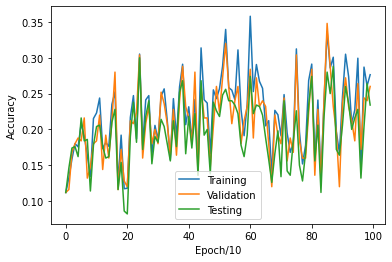

In [10]:
plot_accuracies(t_ac, v_ac, te_ac)


### Try different learning rates and plot graphs for all (20%)


In [ ]:
# Initialize the best values
best_weights = weights
best_learning_rate = learning_rate
best_weight_decay = weight_decay

# TODO
# Repeat the above training and evaluation steps for the following learning rates and plot graphs
# You need to try 3 learning rates and submit all 3 graphs along with this notebook pdf to show your learning rate experiments
learning_rates = []
weight_decay = 0.0  # No regularization for now

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for lr in learning_rates: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)

learning_rate_info = {}
best_learning_rate

for learning_rate in learning_rates:
    # TODO: Train the classifier with different learning rates and plot
    # pass
    t_ac, v_ac, te_ac, weights = train(learning_rate, weight_decay)
    learning_rate_info[learning_rate] = [t_ac, v_ac, te_ac, weights]


In [ ]:
for i, learning_rate in enumerate(learning_rates):
    t_ac, v_ac, te_ac = learning_rate_info[learning_rate][0], learning_rate_info[learning_rate][1], learning_rate_info[learning_rate][2]
    plt.subplot(2, 3, i + 1)
    plt.title("Learning rate: {}".format(learning_rate))
    plot_accuracies(t_ac, v_ac, te_ac)

plt.show()


#### Inline Question 1.

Which one of these learning rates (best_lr) would you pick to train your model? Please Explain why.


#### Your Answer:


### Regularization: Try different weight decay and plots graphs for all (20%)


In [ ]:
# Initialize a non-zero weight_decay (Regulzarization constant) term and repeat the training and evaluation
# Use the best learning rate as obtained from the above excercise, best_lr

# You need to try 3 learning rates and submit all 3 graphs along with this notebook pdf to show your weight decay experiments
weight_decays = []

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for weight_decay in weight_decays: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(best_lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)

for weight_decay in weight_decays:
    # TODO: Train the classifier with different weighty decay and plot
    # pass
    t_ac, v_ac, te_ac, weights = train(best_learning_rate, weight_decay)
    weight_decay_info[weight_decay] = [t_ac, v_ac, te_ac, weights]

#### Inline Question 2.

Discuss underfitting and overfitting as observed in the 5 graphs obtained by changing the regularization.
Which weight_decay term gave you the best classifier performance?
HINT: Do not just think in terms of best training set performance, keep in mind that the real utility of a machine learning model is when it performs well on data it has never seen before


#### Your Answer:


### Visualize the filters (10%)


In [ ]:
# These visualizations will only somewhat make sense if your learning rate and weight_decay parameters were
# properly chosen in the model. Do your best.

# TODO: Run this cell and Show filter visualizations for the best set of weights you obtain.
# Report the 2 hyperparameters you used to obtain the best model.

# NOTE: You need to set `best_learning_rate` and `best_weight_decay` to the values that gave the highest accuracy
print("Best LR:", best_learning_rate)
print("Best Weight Decay:", best_weight_decay)

# NOTE: You need to set `best_weights` to the weights with the highest accuracy
w = best_weights[:, :-1]
w = w.reshape(10, 3, 32, 32).transpose(0, 2, 3, 1)

w_min, w_max = np.min(w), np.max(w)

fig = plt.figure(figsize=(16, 16))
classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
for i in range(10):
    fig.add_subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[i, :, :, :].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype(int))
    plt.axis("off")
    plt.title(classes[i])
plt.show()


#### Inline Question 3. (10%)

a. Compare and contrast the performance of the 2 classifiers i.e. Linear Regression and Logistic Regression.
b. Which classifier would you deploy for your multiclass classification project and why?


#### Your Answer:
